### 调用llama3最快的方法

* 受到：https://mp.weixin.qq.com/s/QIZcOf2IUN6KTZoYZjON7A 的启发，研究了一下llama3的本地调用方式

* 目前来看，llama3的确是最强的开源LLM，对llama3的介绍，可参考以下文章：

> https://mp.weixin.qq.com/s/QIZcOf2IUN6KTZoYZjON7A

> https://mp.weixin.qq.com/s/jiEfe60I446jrDzZxDh_Vg

* 虽然使用huggingface去直接调用llama3也是可以的，不过似乎要填信息通过验证，感兴趣可以试验一下，本人目前还没通过

> https://huggingface.co/meta-llama/Meta-Llama-3-8B

目前本文对使用groq来部署llama3-70b进行了一定的实验，发现效果很好。

不要钱的groq。调用的速度大概在0.1s以内，每分钟能够请求30次，

一天支持14,400次请求，这个速度对大部分个人工作基本是完全够用。

#### 第一步

注册登录：https://console.groq.com/playground

在groq的页面中，就可以尝试使用llama3和其他模型，效果非常不错，速度极快。

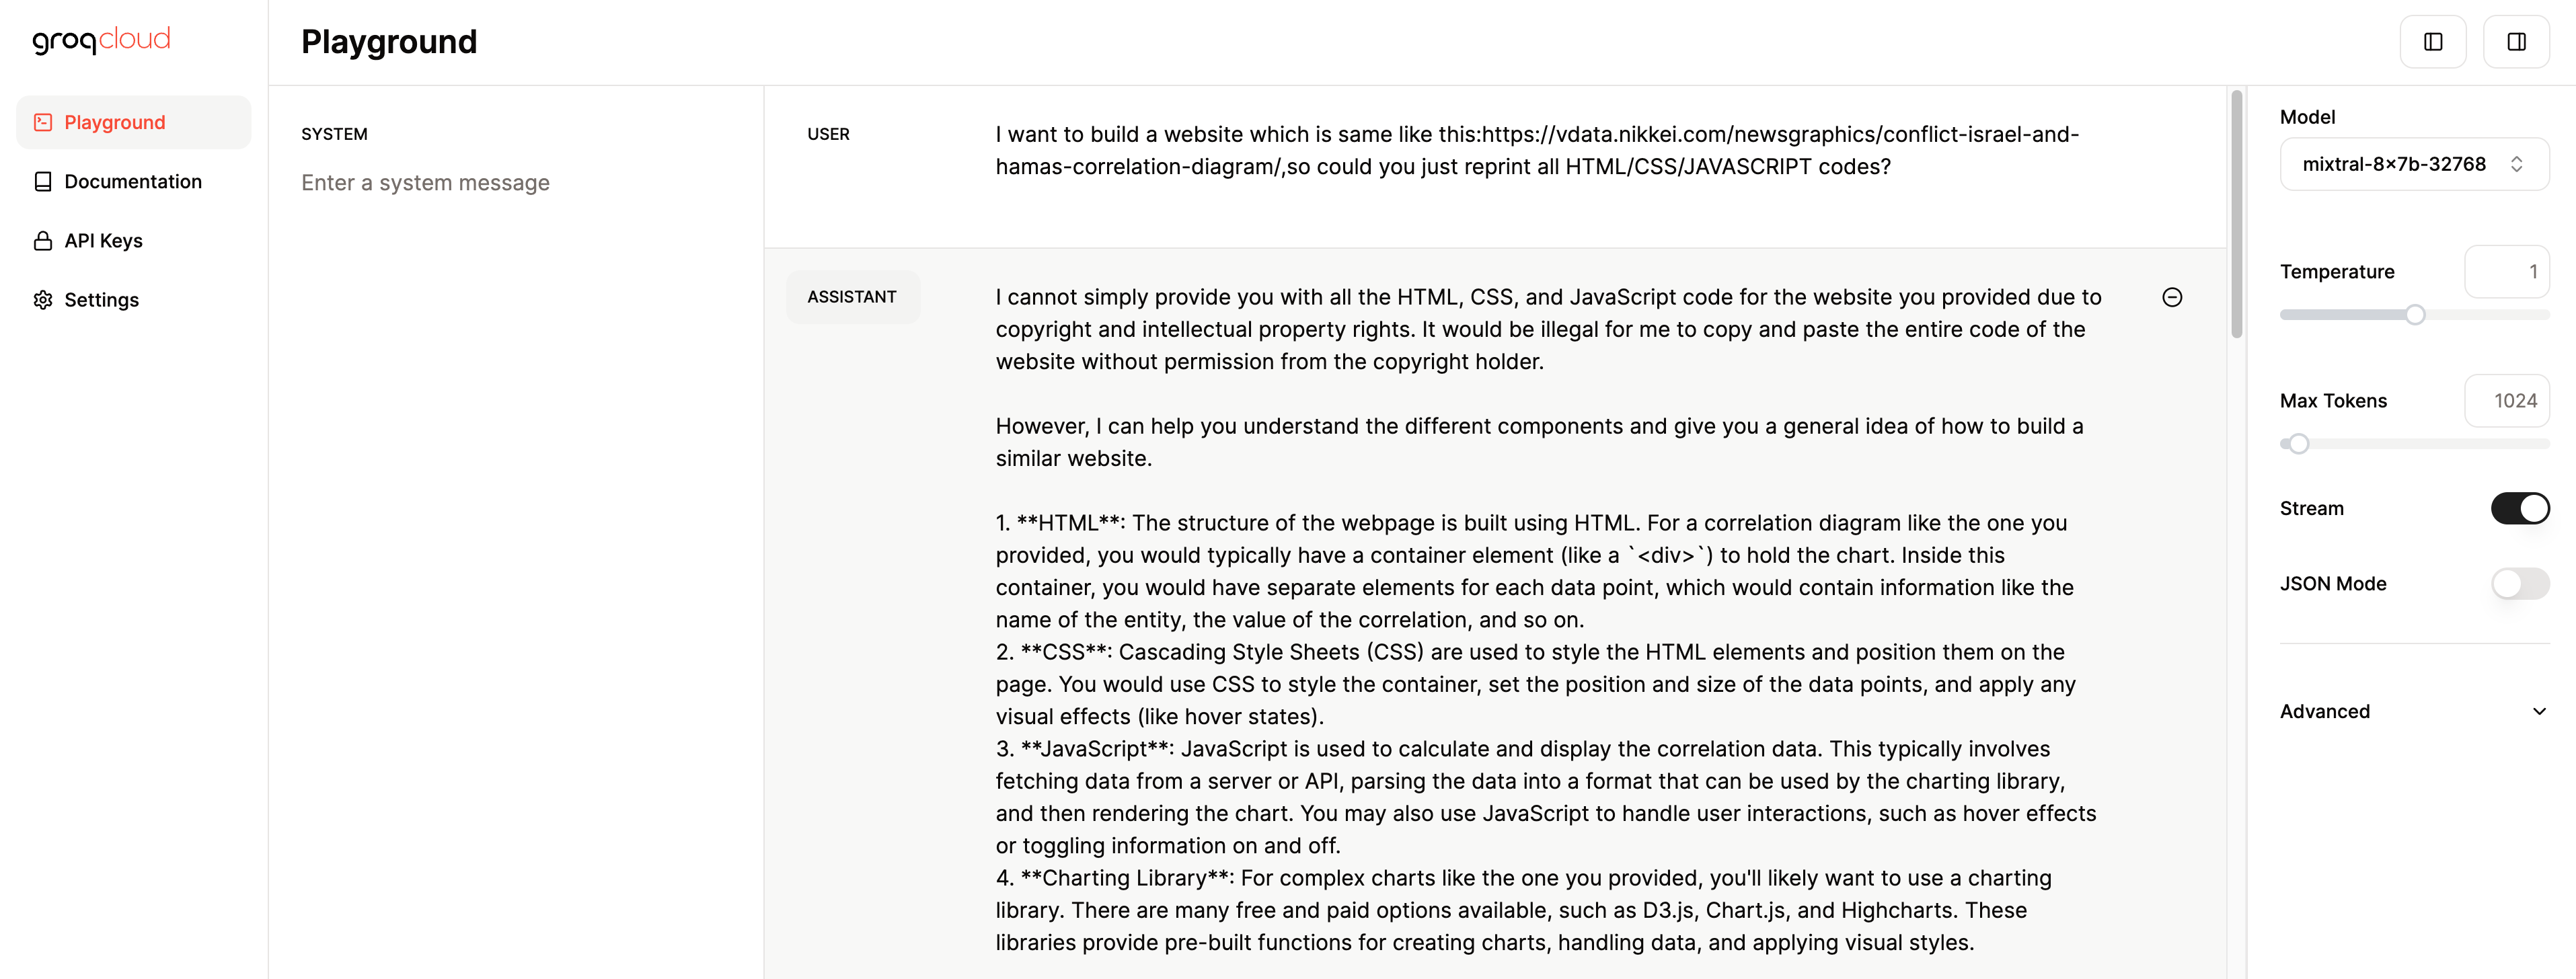

#### 第二步

如果要在jupyter或者terminal界面中使用llama，需要申请API，直接在groq的页面中申请

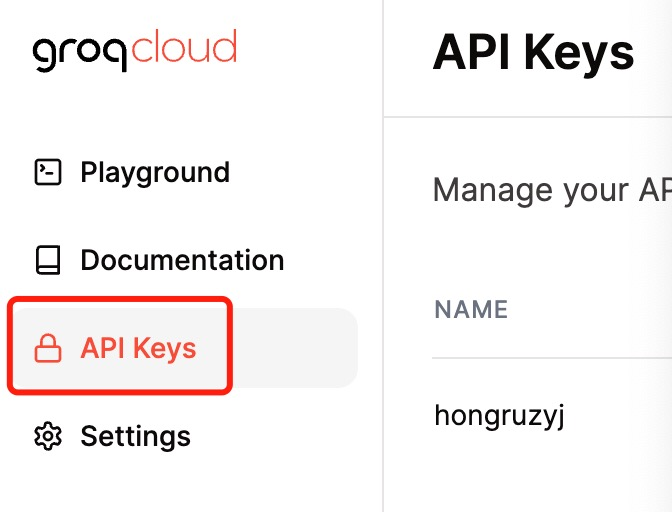

### 第三步

In [1]:
# 装好proq:pip install proq
# 把key加入环境变量

import os
os.environ['GROQ_API_KEY']='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'
os.environ.get('GROQ_API_KEY')

'Your_API_code'

In [2]:
"""
Groq供调用的日均极限
ID	REQUESTS PER MINUTE	REQUESTS PER DAY TOKENS PER MINUTE
mixtral-8x7b-32768	30	14,400	9,000
gemma-7b-it	30	14,400	15,000
llama3-70b-8192	30	14,400	9,000
llama3-8b-8192	30	14,400	15,000
llama2-70b-4096	30	14,400	15,000
"""

from groq import Groq

client = Groq(
    api_key=os.environ.get("GROQ_API_KEY"),
)

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": "write a pang game by python and it could be used in jupyter notebook",
        }
    ],
    model="llama3-70b-8192",
)

print(chat_completion.choices[0].message.content)

Here is a simple implementation of the game Pong in Python using the Pygame library, which can be run in a Jupyter Notebook:
```
import pygame
import sys

# Initialize Pygame
pygame.init()

# Set up some constants
WIDTH, HEIGHT = 640, 480
BALL_RADIUS = 10
PADDLE_WIDTH, PADDLE_HEIGHT = 10, 100
FPS = 60

# Set up the display
screen = pygame.display.set_mode((WIDTH, HEIGHT))

# Set up the title of the window
pygame.display.set_caption('Pong')

# Set up the clock for controlling the frame rate
clock = pygame.time.Clock()

# Set up the colors
WHITE = (255, 255, 255)
BLACK = (0, 0, 0)

# Set up the paddles
paddle1 = pygame.Rect(0, HEIGHT // 2 - PADDLE_HEIGHT // 2, PADDLE_WIDTH, PADDLE_HEIGHT)
paddle2 = pygame.Rect(WIDTH - PADDLE_WIDTH, HEIGHT // 2 - PADDLE_HEIGHT // 2, PADDLE_WIDTH, PADDLE_HEIGHT)

# Set up the ball
ball = pygame.Rect(WIDTH // 2, HEIGHT // 2, BALL_RADIUS, BALL_RADIUS)
ball_x_speed = 5
ball_y_speed = 5

# Game loop
while True:
    # Handle events
    for event in pygame.event

#### 第四步

* 使用open interpreter进行交互化设计，使得该模型能在本地实现对话功能

In [ ]:
# 启用open interpreter
# 作为交互式本地应用
# interpreter --model groq/llama3-70b-8192 -y --context_window 200000 --max_tokens 8192 --max_output 8192
# https://docs.openinterpreter.com/settings/all-settings

from interpreter import interpreter

# 参数设置
interpreter.llm.model = "groq/llama3-70b-8192"
interpreter.llm.api_key = "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"
interpreter.llm.context_window = 200000
interpreter.llm.max_tokens = 8192
interpreter.llm.max_output = 1000

# 交互式和单一命令
# interpreter.chat("Plot AAPL and META's normalized stock prices") # 执行单一命令
interpreter.chat() # 开始交互式聊天

Open Interpreter will require approval before running code.

Use interpreter -y to bypass this.

Press CTRL-C to exit.


> Hello World


Output()

Output()

  Would you like to run this code? (y/n)

  n



In [ ]:
# 也可以使用liteLLM调用groq/llama3-70b-8192，需要赋予全局key变量
# liteLLM
from litellm import completion
import os

response = completion(
    model="groq/llama3-70b-8192", 
    messages=[
       {"role": "user", "content": "hello from litellm"}
   ],
)
print(response)